## ECBM E6040 Homework 3 - Programming Problem

In [3]:
import matplotlib.pyplot as plt
import pylab
%matplotlib inline

### Problem a: Regularization Methods for Neural Network
For this part the parameters are : learning_rate=0.01, n_epochs=50, batch_size=128, n_hidden=500, n_hiddenLayers=3 and no regularization.

#### Bullet 1: Implement a MLP

##### Test with small dataset

In [2]:
from hw3a import test_mlp
test_mlp(learning_rate=0.01, L1_reg=0.00, L2_reg=0.0000, n_epochs=50,
             batch_size=128, n_hidden=500, n_hiddenLayers=3,
             verbose=False, smaller_set=True)

... building the model
... training
Optimization complete.

Using gpu device 0: GRID K520
The training process for function test_mlp ran for 0.40m


Best validation score of 60.085227 % obtained at iteration 5150, with test performance 60.375616 %


##### Test with the original dataset

In [3]:
test_mlp(learning_rate=0.01, L1_reg=0.00, L2_reg=0.0000, n_epochs=50,
             batch_size=128, n_hidden=500, n_hiddenLayers=3,
             verbose=False, smaller_set=False)

... building the model
... training
Optimization complete.
Best validation score of 35.800439 % obtained at iteration 9785, with test performance 38.242765 %


The training process for function test_mlp ran for 0.62m


The small dataset has more bias than the original one.

#### Bullet 2: Experiment with noise injection at input

We add to the inputs a Gaussian noise $Z\sim N(0,\sigma)$

##### $\sigma=1$

In [4]:
from hw3a import test_noise_inject_at_input
test_noise_inject_at_input(learning_rate=0.01, L1_reg=0.00,
             L2_reg=0.000, n_epochs=50,
             batch_size=128, n_hidden=500, n_hiddenLayers=3,
             verbose=False,noise=1)

... building the model
... training
Optimization complete.
Best validation score of 77.982955 % obtained at iteration 5150, with test performance 77.601601 %


The training process for function test_noise_inject_at_input ran for 0.54m


##### $\sigma=10$

In [5]:
test_noise_inject_at_input(learning_rate=0.01, L1_reg=0.00,
             L2_reg=0.000, n_epochs=50,
             batch_size=128, n_hidden=500, n_hiddenLayers=3,
             verbose=False,noise=10)

... building the model
... training
Optimization complete.
Best validation score of 81.250000 % obtained at iteration 9270, with test performance 81.480911 %


The training process for function test_noise_inject_at_input ran for 0.54m


##### $\sigma=0.1$

In [6]:
test_noise_inject_at_input(learning_rate=0.01, L1_reg=0.00,
             L2_reg=0.000, n_epochs=50,
             batch_size=128, n_hidden=500, n_hiddenLayers=3,
             verbose=False,noise=0.1)

... building the model
... training
Optimization complete.
Best validation score of 38.494318 % obtained at iteration 9785, with test performance 41.163793 %


The training process for function test_noise_inject_at_input ran for 0.59m


As the variance goes down, the accuracy goes up.

For  $\sigma=0.1$, the injection at the inputs gives a better accuracy than the MLP with the small set.

#### Bullet 3: Experiment with noise injection at weights

We add to the weights after update a Gaussian noise $Z\sim N(0,\sigma)$

##### $\sigma=1$

In [4]:
from hw3a import test_noise_injection_at_weight
test_noise_injection_at_weight(learning_rate=0.01, L1_reg=0.00,
             L2_reg=0.000, n_epochs=50,
             batch_size=128, n_hidden=500, n_hiddenLayers=3,
             verbose=False,noise=1)

... building the model
... training
Optimization complete.
Best validation score of 82.599432 % obtained at iteration 103, with test performance 82.031250 %


The training process for function test_noise_injection_at_weight ran for 11.00m


##### $\sigma=10$

In [8]:
test_noise_injection_at_weight(learning_rate=0.01, L1_reg=0.00,
             L2_reg=0.000, n_epochs=50,
             batch_size=128, n_hidden=500, n_hiddenLayers=3,
             verbose=False,noise=10)

... building the model
... training
Optimization complete.
Best validation score of 86.434659 % obtained at iteration 2266, with test performance 85.910560 %


The training process for function test_noise_injection_at_weight ran for 11.14m


##### $\sigma=0.1$

In [3]:
test_noise_injection_at_weight(learning_rate=0.01, L1_reg=0.00,
             L2_reg=0.000, n_epochs=50,
             batch_size=128, n_hidden=500, n_hiddenLayers=3,
             verbose=False,noise=0.1)

... building the model
... training
Optimization complete.
Best validation score of 86.434659 % obtained at iteration 2163, with test performance 87.638547 %


The training process for function test_noise_injection_at_weight ran for 10.87m


Oddly, as the variance increases, the accuracy decreases. 

The effect of adding noise to the weights is to penalize large gradients of the outputs with respect to the weights.

None of these models has a better accuracy than the model in (i).

#### Bullet 4: Experiment with data augmentation

In [4]:
from hw3a import test_data_augmentation
test_data_augmentation(learning_rate=0.01,
             L1_reg=0.00, L2_reg=0.00, n_epochs=50,
             batch_size=128, n_hidden=500, n_hiddenLayers=3,
             verbose=False)


... building the model
... training
Optimization complete.
Best validation score of 37.073864 % obtained at iteration 9785, with test performance 38.970135 %


The training process for function test_data_augmentation ran for 0.58m


Data augmentation gives a better accuracy than the small dataset model in (i) and gives the same performance as the large dataset model in (i).

#### Bullet 5: Experiment with adversarial examples

For this Experiment, we reduce the number of epochs : n_epochs=20. The model is the MLP with small dataset in (i). 

In [13]:
from hw3a import test_adversarial_example
probs,probsadv,Im,Imadv=test_adversarial_example(learning_rate=0.01, L1_reg=0.00, L2_reg=0.0000, n_epochs=20,
             batch_size=128, n_hidden=500, n_hiddenLayers=3,
             verbose=False, smaller_set=True)


... building the model
... training
Optimization complete.
Best validation score of 79.474432 % obtained at iteration 2060, with test performance 78.032635 %
Being fooled at example number 46


The training process for function test_adversarial_example ran for 0.14m


In the example number 46, the MLP predicted right (Digit "1"). However, adding $0.001\cdot sgn(\nabla_xL)$ to the inputs gives a bad prediction (predict "2" instead).

The images are displayed below

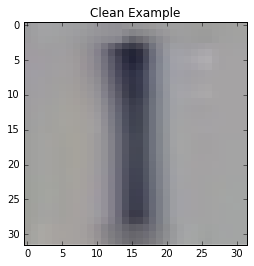

In [17]:
plt.imshow(Im,interpolation="none")
plt.title("Clean Example")

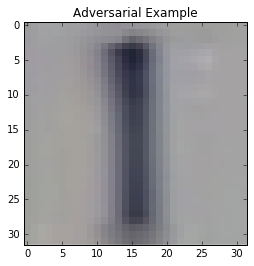

In [18]:
plt.imshow(Imadv,interpolation="none")
plt.title("Adversarial Example")

The barplots are displayed below

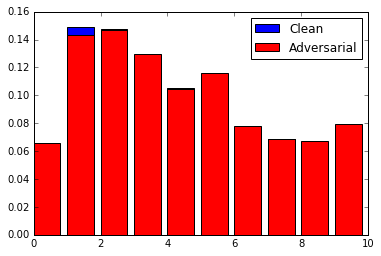

In [21]:
import numpy as np
x=np.arange(10)
len(probs)
plt.bar(x,probs)
plt.bar(x,probsadv,color='red')
plt.legend(["Clean","Adversarial"])

In [12]:
probs

array([ 0.07015687,  0.15939119,  0.16074717,  0.13157597,  0.0997925 ,
        0.10099588,  0.07384495,  0.0700397 ,  0.06220555,  0.07125017], dtype=float32)

### Problem b: Convolutional Neural Network

In this problem, batch_size=200

#### Bullet 1: Implement an CNN

##### nkerns=[16,512]

In [2]:
from hw3b import test_lenet
test_lenet(learning_rate=0.01, n_epochs=50, nkerns=[16, 512],
            batch_size=200, verbose=False)

... building the model
... training
Optimization complete.
Best validation score of 12.763889 % obtained at iteration 9870, with test performance 13.703846 %


The training process for function test_lenet ran for 10.74m


###### nkerns=[30,960]

In [3]:
test_lenet(learning_rate=0.01, n_epochs=50, nkerns=[30 , 960],
            batch_size=200, verbose=True)

... building the model
... training
training @ iter =  0
training @ iter =  100
training @ iter =  200
training @ iter =  300
epoch 1, minibatch 329/329, validation error 81.152778 %
     epoch 1, minibatch 329/329, test error of best model 80.415385 %
training @ iter =  400
training @ iter =  500
training @ iter =  600
epoch 2, minibatch 329/329, validation error 81.152778 %
training @ iter =  700
training @ iter =  800
training @ iter =  900
epoch 3, minibatch 329/329, validation error 81.152778 %
training @ iter =  1000
training @ iter =  1100
training @ iter =  1200
training @ iter =  1300
epoch 4, minibatch 329/329, validation error 81.152778 %
training @ iter =  1400
training @ iter =  1500
training @ iter =  1600
epoch 5, minibatch 329/329, validation error 80.458333 %
     epoch 5, minibatch 329/329, test error of best model 79.826923 %
training @ iter =  1700
training @ iter =  1800
training @ iter =  1900
epoch 6, minibatch 329/329, validation error 78.722222 %
     epoch 6, 

The training process for function test_lenet ran for 30.22m


Accuracy : 86.77%

##### nkerns=[8,256]

In [4]:
test_lenet(learning_rate=0.01, n_epochs=50, nkerns=[8, 256],
            batch_size=200, verbose=False)

... building the model
... training
Optimization complete.
Best validation score of 14.388889 % obtained at iteration 9870, with test performance 15.146154 %


The training process for function test_lenet ran for 4.61m


Adding more filters will improve the accuracy

#### Bullet 2: Implement a multi-stage CNN

##### nkerns=[16,512,20]

In [22]:
from hw3b import test_convnet
test_convnet(learning_rate=0.01, n_epochs=50, nkerns=[16, 512, 20],
        batch_size=200, verbose=False)

... building the model
... training
Optimization complete.
Best validation score of 13.402778 % obtained at iteration 9870, with test performance 14.615385 %


The training process for function test_convnet ran for 14.88m


##### nkerns=[30,960,40]

In [2]:
test_convnet(learning_rate=0.01, n_epochs=50, nkerns=[30, 960, 40],
        batch_size=200, verbose=False)

... building the model
... training
Optimization complete.
Best validation score of 11.944444 % obtained at iteration 9870, with test performance 13.176923 %


The training process for function test_convnet ran for 45.71m


##### nkerns=[8,256,10]

In [3]:
test_convnet(learning_rate=0.01, n_epochs=50, nkerns=[8, 256, 10],
        batch_size=200, verbose=False)

... building the model
... training
Optimization complete.
Best validation score of 13.513889 % obtained at iteration 12173, with test performance 14.696154 %


The training process for function test_convnet ran for 7.87m


Again, adding more filter will improve the model. However the ms-CNN not always gives a better accuracy than the CNN.

#### Bullet 3: Explain why the back-propogation algorithm works on ms-cnn

The ms-cnn is a case of Parameter Sharing and particularly Multi-Task Learning. The shared representation is layer 0 is associated with two tasks layer 1 and downsample layer 0.

In this case, the propagation of the gradient still occurs as the chain rule still holds.

#### Bullet 4: Implement CNN plus MLP

##### CNN+MLP


In [5]:
from hw3b import test_CDNN
test_CDNN(learning_rate=0.01, n_epochs=50, nkerns=[16, 512],
            batch_size=200,n_hidden=500, verbose=False)

... building the model
... training
Optimization complete.
Best validation score of 37.861111 % obtained at iteration 9541, with test performance 39.530769 %


The training process for function test_CDNN ran for 4.88m


#### MLP with 4 hidden layers


In [8]:
test_mlp(learning_rate=0.01, L1_reg=0.00, L2_reg=0.0000, n_epochs=50,
             batch_size=200, n_hidden=500, n_hiddenLayers=4,
             verbose=False, smaller_set=False)

... building the model
... training
Optimization complete.
Best validation score of 31.319444 % obtained at iteration 9870, with test performance 34.823077 %


The training process for function test_mlp ran for 0.88m


The MLP still gives a better accuracy than the CDNN